# Homework 4

### Import libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from scipy.optimize import minimize
from functools import partial

### Read data

In [4]:
X_train = pd.read_csv('X_train.txt', header=None)
Y_train = pd.read_csv('Y_train.txt', header=None).to_numpy()
X_val = pd.read_csv('X_val.txt', header=None)
Y_val = pd.read_csv('Y_val.txt', header=None).to_numpy()

### Question 1

**Show that the ERM with logistic loss and MLE with negative log-likelihood (NLL) are equivalent.**

Logistic loss function (ERM):

$$
L(\theta) = \frac{1}{n}\sum\limits^n_i log(1+e^{-y_i\theta^Tx_i}) \text{ where y }\in \{-1, 1\}
$$

Negative log-likelihood (MLE):

$$
L(\theta) = -\frac{1}{n}\sum\limits^n_i y_i log(\frac{1}{1+e^{-\theta^Tx_i}}) + (1-y_i)log(1-\frac{1}{1+e^{-\theta^Tx_i}})\text{ where y }\in \{0, 1\}
$$

Let's take a single example for both approaches.

Case 1: $y_i = 1$ (ERM) and $y_i = 1$ (MLE)

$$
L(\theta) = log(1+e^{-y_i\theta^Tx_i}) = log(1+e^{-\theta^Tx_i})
$$

$$
L(\theta) =  -y_i log(\frac{1}{1+e^{-\theta^Tx_i}}) - (1-y_i)log(1-\frac{1}{1+e^{-\theta^Tx_i}}) = -log(\frac{1}{1+e^{-\theta^Tx_i}}) = log(1+e^{-\theta^Tx_i})\
$$

Case 1: $y_i = -1$ (ERM) and $y_i = 0$ (MLE)
$$
L(\theta) = log(1+e^{-y_i\theta^Tx_i}) = log(1+e^{\theta^Tx_i})
$$
$$
L(\theta) =  -y_i log(\frac{1}{1+e^{-\theta^Tx_i}}) - (1-y_i)log(1-\frac{1}{1+e^{-\theta^Tx_i}}) = -log(1-\frac{1}{1+e^{-\theta^Tx_i}}) = -log(\frac{e^{\theta^Tx_i}}{e^{\theta^Tx_i}}-\frac{1}{1+e^{-\theta^Tx_i}}) = log(1+e^{\theta^Tx_i})
$$

For both cases, both approaches yield the same result.

### Question 2

Show that the decision boundary of logistic regression is given by $x^Tw = 0$

I will prove this in two parts, first I will show that the decision boundary is indeed $x^Tw$ and then I will show that it equals 0.

Starting on the log odds expression in slide 18 of the Conditional Models lecture:

$$
log\big(\frac{P(y=1|x)}{P(y=0|x)}\big) = log\big(\frac{\frac{1}{1+e^{-x^Tw}}}{1-\frac{1}{1+e^{-x^Tw}}}\big) = log\big(\frac{\frac{1}{1+e^{-x^Tw}}}{\frac{e^{-x^Tw}}{1+e^{-x^Tw}}}\big) = log\big(\frac{1}{e^{-x^Tw}}\big) = x^Tw
$$

Now, we know that by definition the decision boundary is where $P(y=1|x) = 0.5$ and $P(y=0|x) = 0.5$

$$
P(y=1|x) = \frac{1}{2} \rightarrow \frac{1}{1+e^{-x^Tw}} = \frac{1}{2} \rightarrow 1 = e^{-x^Tw} \rightarrow log(1) = -x^Tw \rightarrow x^Tw = 0
$$

$$
P(y=0|x) = \frac{1}{2} \rightarrow 1-\frac{1}{1+e^{-x^Tw}} = \frac{1}{2} \rightarrow 2e^{-x^Tw} = 1+e^{-x^Tw} \rightarrow x^Tw = 0
$$

Here we can see that for both possible cases, the decision boundary $x^Tw$ equals 0.

### Question 3

$$
L(cw) = \sum\limits^n_{i=1} y_ilog(f(cw^Tx_i)) + (1-y_i)log(1-f(cw^Tx_i)) \text{ where } y_i \in 0,1
$$
$$
L(cw) = \sum\limits^n_{i=1} y_ilog(\frac{1}{1+e^{-cw^Tx_i}}) + (1-y_i)log(1-\frac{1}{1+e^{-cw^Tx_i}})
$$
$$
\frac{\partial L(cw)}{\partial c
} = \sum\limits^n_{i=1} y_i\frac{e^{-cw^Tx_i}w^Tx_i}{1+e^{-cw^Tx_i}} - (1-y_i)\frac{w^Tx_i}{1+e^{-cw^Tx_i}}
$$

When $y_i = 1$:

$$
\frac{\partial L(cw)}{\partial c
} = \frac{e^{-cw^Tx_i}w^Tx}{1+e^{-cw^Tx_i}}
$$

Since all of our predictions are correct, w^Tx is positive. Additionally, e^-cw^Tx is also positive and therefore the whole expression is positive.

When $y_i = 0$:

$$
\frac{\partial L(cw)}{\partial c
} = \frac{-w^Tx_i}{1+e^{-cw^Tx_i}}
$$

Similarly, w^Tx is negative (due to all of our predictions being correct) and therefore this expression is also positive.

In conclusion, it is clear that we can simply increase the likelihood by increasing the scalar $c$, thus this MLE is not well-defined.

### Question 4

Let's prove that $J(w)$ is convex.

$$
J(w) = \frac{1}{n}\sum\limits^n_{i=1}log(1+e^{-y^{(i)}w^Tx^{(i)}}) + \lambda||w||^2
$$

The first part of the expression can be rewritten as:

$$
\frac{1}{n}\sum\limits^n_{i=1}log(1+e^{-y^{(i)}w^Tx^{(i)}}) = \frac{1}{n}\sum\limits^n_{i=1}log(e^0+e^{-y^{(i)}w^Tx^{(i)}})
$$

The form $log(e^{x_1}+...+e^{x_n})$ is called Log-Sum-Exp and it is convex (based on Professor Rosenberg's notes on Convex Optimization) and therefore the first part of our expression is also convex.

Now, given that norms are also convex and the addition of two convex functions is also convex, $J(w)$ is convex.

### Question 5

In [5]:
def f_objective(theta, X, y, l2_param=1):
    '''
    Args:
        theta: 1D numpy array of size num_features
        X: 2D numpy array of size (num_instances, num_features)
        y: 1D numpy array of size num_instances
        l2_param: regularization parameter

    Returns:
        objective: scalar value of objective function 
    '''        
    
    loss, n = 0, X.shape[0]

    for idx in range(len(X_train)):
        loss += np.logaddexp(0,-Y_train[idx] * theta.T @ X_train.iloc[idx, :]) + l2_param * np.dot(theta, theta)
    
    return 1/n * loss

### Question 6

Let's first preprocess the data

In [6]:
#Standardize data
scaler = StandardScaler()
X_train, X_val = pd.DataFrame(scaler.fit_transform(X_train)), pd.DataFrame(scaler.transform(X_val))

#Add bias column
X_train['bias'] = 1
X_val['bias'] = 1

Y_train[Y_train == 0] = -1
Y_val[Y_val == 0] = -1

In [7]:
def fit_logistic_reg(X, y, objective_function, l2_param=1):
    '''
    Args:
        X: 2D numpy array of size (num_instances, num_features)
        y: 1D numpy array of size num_instances
        objective_function: function returning the value of the objective
        l2_param: regularization parameter
        
    Returns:
        optimal_theta: 1D numpy array of size num_features
    '''
    obj_func = partial(objective_function, X=X, y=y, l2_param=l2_param)
    
    return minimize(obj_func, theta).x

In [6]:
theta = np.ones(X_train.shape[1])
fit_logistic_reg(X_train, Y_train, f_objective, l2_param=1)

array([ 0.0009563 , -0.00029966,  0.0030268 ,  0.10532761, -0.00358737,
       -0.00135853, -0.00385287, -0.00079009, -0.00114408, -0.07178436,
        0.00654886, -0.004511  ,  0.01124926, -0.0038644 , -0.00271267,
        0.00150362, -0.00278399, -0.00919062, -0.00682279, -0.01027485,
        0.00281869])

### Question 7

In [8]:
def log_likelihood(theta, X, y):

    loss = 0
    for idx in range(len(X)):
        loss += np.logaddexp(0,-y[idx] * theta.T @ X.iloc[idx, :])
    
    return loss

In [8]:
lambda_list = np.logspace(-3, -1, num=10)
loss_list = []

for lbd in lambda_list: 
    theta = fit_logistic_reg(X_train, Y_train, f_objective, l2_param=lbd)
    loss_list.append(log_likelihood(theta, X_val, Y_val))

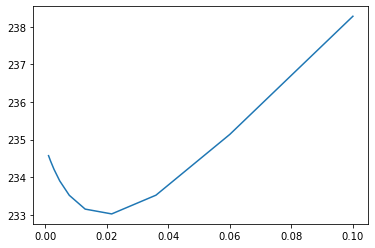

In [10]:
plt.plot(lambda_list, loss_list)

### Question 8

In [10]:
theta = np.ones(X_train.shape[1])

In [11]:
best_theta = fit_logistic_reg(X_train, Y_train, f_objective, l2_param = 0.02)

In [31]:
pred = []
for i in range(len(X_train)):
    pred.append(round(1 / (1+np.exp(-best_theta @ X_train.iloc[i,:])),1))

In [53]:
df = pd.DataFrame()
df['pred'] = pred
df['Y_train'] = Y_train
df['Y_train'].replace({-1:0}, inplace=True)

In [57]:
df = df.groupby(pred).mean()['Y_train']

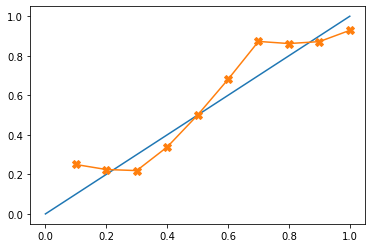

In [79]:
plt.plot([0,1],[0,1])
plt.plot(df.index, df.values, marker='X', markersize=8)
plt.show()

Overall, there is an observable trend with a small deviation of around 5-10%

### Question 9

We know the following:

$ P(z=H) = \theta_1 \\ P(x=H | z=H) = \theta_2 \\ P(x=T | z=T) = 1$

Following the Law of Total Probability:

$$
\begin{array}{rl}
    P(A) &= P(A,B) + P(A, B^c) \\ 
    &= P(A|B)P(B) + P(A|B^c)P(B^c) \\ 
\end{array}
$$

$$
\begin{array}{rl}
    P(x=H) &= P(x=H,z=H) + P(x=H, z=T) \\ 
    &= P(x=H|z=H)P(z=H) + P(x=H|z=T)P(z=T) \\ 
    &= \theta_2 \theta_1 + 0 \times (1-\theta_1) \\ 
    &= \theta_2 \theta_1 
\end{array}
$$

### Question 10

$$
L(D_r) = \prod\limits^{N_r}_{n=1} P_{\theta_1\theta_2}(x) = P(x=H)^{n_h} \times P(x=T)^{n_t} = (\theta_1\theta_2)^{n_h} \times (1-\theta_1\theta_2)^{n_t}
$$

### Question 11

Let's take the MLE:

$$
L(D_r) = (\theta_1\theta_2)^{n_h} \times (1-\theta_1\theta_2)^{n_t} \rightarrow log(L(D_r)) = n_hlog(\theta_1\theta_2) \times n_tlog(1-\theta_1\theta_2)
$$

Differentiate with respect to $\theta_1$:

$$
\frac{n_h}{\theta_1} - \frac{n_t\theta_2}{1-\theta_1\theta_2} = 0 \rightarrow \theta_1\theta_2 = \frac{n_h}{n_t+n_h}
$$

Differentiate with respect to $\theta_2$:

$$
\frac{n_h}{\theta_2} - \frac{n_t\theta_1}{1-\theta_1\theta_2} = 0 \rightarrow \theta_1\theta_2 = \frac{n_h}{n_t+n_h}
$$

Both equations are the same therefore we can't solve for the parameters $\theta_1$ and $\theta_2$. Therefore, MLE is not a good estimator in this case.